![title](images/header.png)

Merging CEO data phase II (2015-2022)
-------
This notebook merges validated data from different CEO projects for from phase II (2015-2022)
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [42]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'CAR'

### 1. Read all CEO sample files
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [43]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo'3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#GAB
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')
#EQG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-2-sample-data.csv')
#COG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/ceo-CAFI-DDD-République-Congo-eSBAE-validation-1-sample-data.csv')
#CMR
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-Cameroun-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-Cameroun-eSBAE-validation-2-sample-data.csv')
#CAR
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/ceo-CAFI-DDD-RCA-eSBAE-validation-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/ceo-CAFI-DDD-RCA-eSBAE-validation-2-sample-data.csv')

make a list of the ceo files for processing

In [44]:
#depends on how many files you have
# if you have 5 files
#ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5]
# if you have 3 files
#ceo_files = [ceo1, ceo2, ceo3]
# if you have 2 files
ceo_files = [ceo1,ceo2]
# if you have 1 file
#ceo_files = [ceo1]

In [45]:
# output file  CEO validated data file with select columns
ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_1522_clean.csv'

### end of parameters

In [46]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wetness_mean', 'p

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [47]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='pl_point_id', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 
                    'sample_geom', 'pl_point_id', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id': 'point_id',
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_Regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtAg', 
    'Année de Changement': 'Ref_Year', 
    'Type de non-forêt en 2015':'Ref_NFtype', 
    'Type de forêt en 2015':'Ref_Ftype'
    #add other columns as needed
    #,'NOM': 'Province' # DRC province
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0','':'0'},
    'ArtFor':{'oui':'1','non':'0','':'0'},
    'IndFor':{'oui':'1','non':'0','':'0'},
    'ArtAg':{'oui':'1','non':'0','':'0'},
    'IndAg':{'oui':'1','non':'0','':'0'},
    'ArtMine':{'oui':'1','non':'0','':'0'},
    'IndMine':{'oui':'1','non':'0','':'0'},
    'Urb':{'oui':'1','non':'0','':'0'},
    'InfraR':{'oui':'1','non':'0','':'0'},
    'Other':{'oui':'1','non':'0','':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)


columns_to_fill = ['Ref_Change_1522','ArtFor','IndFor','IndAg','ArtMine','IndMine','Urb','InfraR','Other']
# Set NaN values in the selected columns to 0
merged_ceo[columns_to_fill] = merged_ceo[columns_to_fill].fillna('0')

ceo 1 # of validated points: 499, # of not validated points: 0
ceo 2 # of validated points: 3878, # of not validated points: 0


remove non validated points and remove duplicates

In [48]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [49]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'sample_geom', 'point_id', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'collection', 'interpreted']


In [50]:
merged_ceo_interpreted.head()

,plotid,sampleid,lon,lat,sample_geom,point_id,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,collection,interpreted
0,63681,63681,16.819339,6.393071,POINT(16.819339 6.393071),63681,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1
1,67460,67460,17.576227,7.664482,POINT(17.576227 7.664482),67460,0,non,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12,NaN,1,1
2,67187,67187,16.170404,5.020706,POINT(16.170404 5.020706),67187,0,non,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12,NaN,1,1
3,68986,68986,16.005941,4.634601,POINT(16.005941 4.634601),68986,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1,1,1
4,69762,69762,17.636659,7.684572,POINT(17.636659 7.684572),69762,0,non,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12,NaN,1,1


In [51]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='point_id', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [52]:
merged_ceo_nodup['interpreted'].value_counts(dropna=False)

interpreted
1    4377
Name: count, dtype: int64

In [53]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,4299
1,78


In [54]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
0    2693
1    1684
Name: count, dtype: int64

In [55]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
NaN              4299
dégradation        41
déforestation      37
Name: count, dtype: int64

In [56]:
merged_ceo_nodup['collection'].value_counts(dropna=False)

collection
2    3878
1     499
Name: count, dtype: int64

##### create a LC type column

In [57]:
merged_ceo_nodup['Ref_LCover'] = merged_ceo_nodup['Ref_Ftype'].fillna(merged_ceo_nodup['Ref_NFtype'])
merged_ceo_nodup['Ref_LCover'].value_counts(dropna=False)

Ref_LCover
12    1282
15     794
11     729
13     568
1      510
9      163
2      126
4      103
3       45
16      40
8        8
14       6
17       3
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [58]:
# this might take some time
unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [59]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [60]:
#merged_ceo_nodup.head()

### 2. add new columns for change and year

clean up columns and replace values

In [61]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] = merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

Ref_Change_Type_1522
NF        2693
Stable    1606
Deg         41
Def         37
Name: count, dtype: int64

In [62]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return ''

merged_ceo_nodup['Ref_Change_Year_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1522'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

Ref_Change_Year_1522
Def2016       5
Def2017       7
Def2018       7
Def2019       3
Def2020       1
Def2021      10
Def2022       4
Deg2017       1
Deg2018       6
Deg2019       7
Deg2020       4
Deg2021       5
Deg2022      18
NF         2693
Stable     1606
Name: count, dtype: int64


In [63]:
annual_counts.sum()

4377

In [64]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Year_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Year_1522,,
Def2016,5,5
Def2017,7,7
Def2018,7,7
Def2019,3,3
Def2020,1,1
Def2021,10,10
Def2022,4,4
Deg2017,1,1
Deg2018,6,6


In [65]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Type_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Type_1522,,
Def,37,37
Deg,41,41
NF,2693,2693
Stable,1606,1606
Total,4377,4377


In [66]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2022', 1, 0)

In [67]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2022', 1, 0)

In [68]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Deg', 1, 0)

In [69]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'NF', 1, 0)

In [70]:
merged_ceo_column_names = merged_ceo_nodup.columns.tolist()
# Print the list of column names
print(merged_ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'sample_geom', 'point_id', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'collection', 'interpreted', 'Ref_LCover', 'Ref_Change_Year_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF']


In [71]:
merged_ceo_nodup.head()

,plotid,sampleid,lon,lat,sample_geom,point_id,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,63681,63681,16.819339,6.393071,POINT(16.819339 6.393071),63681,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1,11,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,437190,437190,23.734723,6.962044,POINT(23.734723 6.962044),437190,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1,11,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,437177,437177,23.668753,6.832323,POINT(23.668753 6.832323),437177,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,436868,436868,24.209607,7.924760,POINT(24.209607 7.92476),436868,0,oui,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,15,NaN,1,1,15,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,436305,436305,23.461073,6.463532,POINT(23.461073 6.463532),436305,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1,11,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
print(merged_ceo_nodup.columns.values)

['plotid' 'sampleid' 'lon' 'lat' 'sample_geom' 'point_id' 'Ref_FNF_2015'
 'Ref_Regeneration' 'Ref_Change_1522' 'Ref_Change_Type_1522' 'ArtFor'
 'ArtMine' 'InfraR' 'Urb' 'IndFor' 'Other' 'Other_Desc' 'IndMine' 'IndAg'
 'ArtAg' 'Ref_Year' 'Ref_NFtype' 'Ref_Ftype' 'collection' 'interpreted'
 'Ref_LCover' 'Ref_Change_Year_1522' 'Def2016' 'Def2017' 'Def2018'
 'Def2019' 'Def2020' 'Def2021' 'Def2022' 'Deg2016' 'Deg2017' 'Deg2018'
 'Deg2019' 'Deg2020' 'Deg2021' 'Deg2022' 'Defall' 'Degall' 'Stable' 'NF']


In [73]:
merged_ceo_nodup['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NF         2693
Stable     1606
Deg2022      18
Def2021      10
Deg2019       7
Def2017       7
Def2018       7
Deg2018       6
Def2016       5
Deg2021       5
Deg2020       4
Def2022       4
Def2019       3
Deg2017       1
Def2020       1
Name: count, dtype: int64

In [74]:
merged_ceo_nodup.head()

,plotid,sampleid,lon,lat,sample_geom,point_id,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,63681,63681,16.819339,6.393071,POINT(16.819339 6.393071),63681,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1,11,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,437190,437190,23.734723,6.962044,POINT(23.734723 6.962044),437190,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1,11,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,437177,437177,23.668753,6.832323,POINT(23.668753 6.832323),437177,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,12,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,436868,436868,24.209607,7.924760,POINT(24.209607 7.92476),436868,0,oui,0,NF,0,0,0,0,0,0,NaN,0,0,NaN,NaN,15,NaN,1,1,15,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,436305,436305,23.461073,6.463532,POINT(23.461073 6.463532),436305,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,11,1,1,11,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
merged_ceo_nodup['ISO'] = iso

### 3. plot change points by year

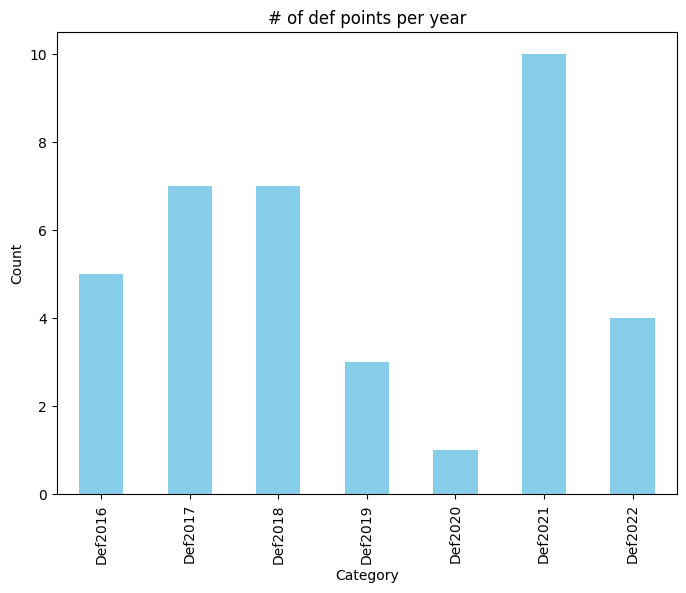

In [76]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

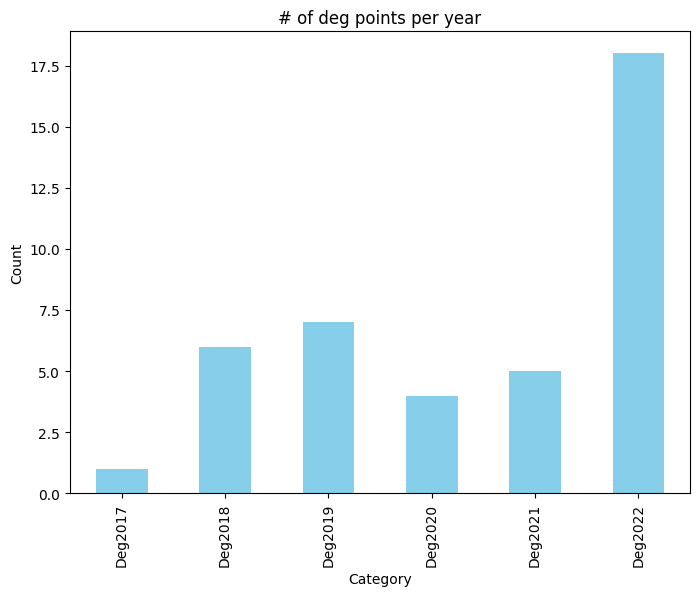

In [77]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [78]:
print(merged_ceo_nodup.dtypes)

plotid                    int64
sampleid                  int64
lon                     float64
lat                     float64
sample_geom              object
point_id                  int64
Ref_FNF_2015             object
Ref_Regeneration         object
Ref_Change_1522          object
Ref_Change_Type_1522     object
ArtFor                   object
ArtMine                  object
InfraR                   object
Urb                      object
IndFor                   object
Other                    object
Other_Desc               object
IndMine                  object
IndAg                    object
ArtAg                    object
Ref_Year                float64
Ref_NFtype               object
Ref_Ftype                object
collection                int64
interpreted               int64
Ref_LCover               object
Ref_Change_Year_1522     object
Def2016                   int64
Def2017                   int64
Def2018                   int64
Def2019                   int64
Def2020 

In [79]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF']
merged_ceo_nodup[columns_to_convert] = merged_ceo_nodup[columns_to_convert].fillna(0)
merged_ceo_nodup[columns_to_convert] = merged_ceo_nodup[columns_to_convert].astype(int)

### 4. export ceo data to one csv file

In [80]:
merged_ceo_nodup.to_csv(ceo_data_out,index_label='ID')